In [3]:
import pandas
print ("pandas is installed and working")

pandas is installed and working


In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('../data/business_expenses.csv')

In [21]:
df.columns = df.columns.str.strip()

In [24]:
# Check non-numeric values in numerical columns
numerical_cols = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']
for col in numerical_cols:
    non_numeric = df[col][df[col].str.contains(r'[^\d\.\-]', na=False)]
    print(f"Non-numeric in {col}:\n", non_numeric.head(), "\n")

# Verify raw data
print("Columns:", df.columns.tolist())
print(df.head())

Non-numeric in Units Sold:
 0     1618.50 
1     1321.00 
2     2178.00 
3      888.00 
4     2470.00 
Name: Units Sold, dtype: object 

Non-numeric in Manufacturing Price:
 0     $3.00 
1     $3.00 
2     $3.00 
3     $3.00 
4     $3.00 
Name: Manufacturing Price, dtype: object 

Non-numeric in Sale Price:
 0     $20.00 
1     $20.00 
2     $15.00 
3     $15.00 
4     $15.00 
Name: Sale Price, dtype: object 

Non-numeric in Gross Sales:
 0     $32,370.00 
1     $26,420.00 
2     $32,670.00 
3     $13,320.00 
4     $37,050.00 
Name: Gross Sales, dtype: object 

Non-numeric in Discounts:
 0     $-   
1     $-   
2     $-   
3     $-   
4     $-   
Name: Discounts, dtype: object 

Non-numeric in Sales:
 0     $32,370.00 
1     $26,420.00 
2     $32,670.00 
3     $13,320.00 
4     $37,050.00 
Name: Sales, dtype: object 

Non-numeric in COGS:
 0     $16,185.00 
1     $13,210.00 
2     $21,780.00 
3      $8,880.00 
4     $24,700.00 
Name: COGS, dtype: object 

Non-numeric in Profit:
 0     

In [25]:
# Convert numerical columns to float
for col in numerical_cols:
    # Remove $, commas, and replace '-' with '0'
    df[col] = df[col].replace(r'[\$,]', '', regex=True).replace('-', '0')
    # Convert to numeric, coerce errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Fill NaN with column mean
    df[col] = df[col].fillna(df[col].mean())

# Verify
print("Data Types:", df.dtypes)
print("Missing Values:", df.isnull().sum())
print("Discounts Sample:", df['Discounts'].head())
print(df.head())

Data Types: Segment                 object
Country                 object
Product                 object
Discount Band           object
Units Sold             float64
Manufacturing Price    float64
Sale Price             float64
Gross Sales            float64
Discounts              float64
Sales                  float64
COGS                   float64
Profit                 float64
Date                    object
Month Number             int64
Month Name              object
Year                     int64
dtype: object
Missing Values: Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64
Discounts Sample: 0    14227.586198
1    14227.58

**Clean and convert the “numeric” columns**

In [27]:
# --- 1. list the columns we want to clean ---
numeric_cols = [
    "Units Sold",
    "Manufacturing Price",
    "Sale Price",
    "Gross Sales",
    "Discounts",
    "Sales",
    "COGS",
    "Profit"
]

# --- 2. build a helper that converts a single string to float ---
def to_number(val):
    """
    Strip $, commas, spaces.  Convert '$-' or '-' to 0.
    Return float or np.nan if conversion fails.
    """
    if pd.isna(val):
        return np.nan
    # treat '$-' or '-' (possibly with spaces) as zero
    if str(val).strip() in {"$-", "-"}:
        return 0.0
    # remove $ , and spaces
    cleaned = (
        str(val)
        .replace("$", "")
        .replace(",", "")
        .strip()
    )
    try:
        return float(cleaned)
    except ValueError:
        return np.nan    # fallback: NaN if it still won’t parse

# --- 3. apply it column-wise ---
for col in numeric_cols:
    df[col] = df[col].apply(to_number)

# --- 4. quick sanity check ---
print(df[numeric_cols].dtypes)   # should all be float64 now
print(df[numeric_cols].head())


Units Sold             float64
Manufacturing Price    float64
Sale Price             float64
Gross Sales            float64
Discounts              float64
Sales                  float64
COGS                   float64
Profit                 float64
dtype: object
   Units Sold  Manufacturing Price  Sale Price  Gross Sales     Discounts  \
0      1618.5                  3.0        20.0      32370.0  14227.586198   
1      1321.0                  3.0        20.0      26420.0  14227.586198   
2      2178.0                  3.0        15.0      32670.0  14227.586198   
3       888.0                  3.0        15.0      13320.0  14227.586198   
4      2470.0                  3.0        15.0      37050.0  14227.586198   

     Sales     COGS   Profit  
0  32370.0  16185.0  16185.0  
1  26420.0  13210.0  13210.0  
2  32670.0  21780.0  10890.0  
3  13320.0   8880.0   4440.0  
4  37050.0  24700.0  12350.0  


**Clean and Parse the Date Column**

In [28]:
# Step 2 – Clean and enrich date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=False)

# Drop rows where date parsing failed (very rare)
df = df.dropna(subset=['Date'])

# Create new time features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['quarter'] = df['Date'].dt.to_period("Q").astype(str)

# Optional: drop redundant columns
df.drop(columns=['Month Number', 'Month Name', 'Year'], inplace=True, errors='ignore')

# Confirm result
print(df[['Date', 'year', 'month', 'quarter']].head())


        Date  year  month quarter
0 2014-01-01  2014      1  2014Q1
1 2014-01-01  2014      1  2014Q1
2 2014-01-06  2014      1  2014Q1
3 2014-01-06  2014      1  2014Q1
4 2014-01-06  2014      1  2014Q1


**Build the feature matrix**

*A. Pick columns*

In [30]:
# Target
target = "COGS"

# Categorical features
cat_cols = ["Segment", "Country", "Product", "Discount Band", "quarter"]

# Numeric features
num_cols = [
    "Units Sold",
    "Manufacturing Price",
    "Sale Price",
    "Gross Sales",
    "Discounts",
    "Sales",
    "Profit",
    "year",
    "month"
]

# Assemble feature dataframe
X = df[cat_cols + num_cols].copy()
y = df[target].copy()


 *B. One-hot encode the categoricals*

In [31]:
# one-hot with pandas; drop_first=True avoids dummy-variable trap
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("Feature matrix shape:", X.shape)


Feature matrix shape: (700, 26)


*C. Train/test split (so we’re ready for modeling next)*

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (560, 26) Test shape: (140, 26)


**Step 4 – Baseline Model: Linear Regression**

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)


*Evaluate The model*

In [34]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")


Linear Regression Performance:
MAE: 4,783.78
RMSE: 7,296.37
R² Score: 0.9989


*Plot Predictions vs Actual*

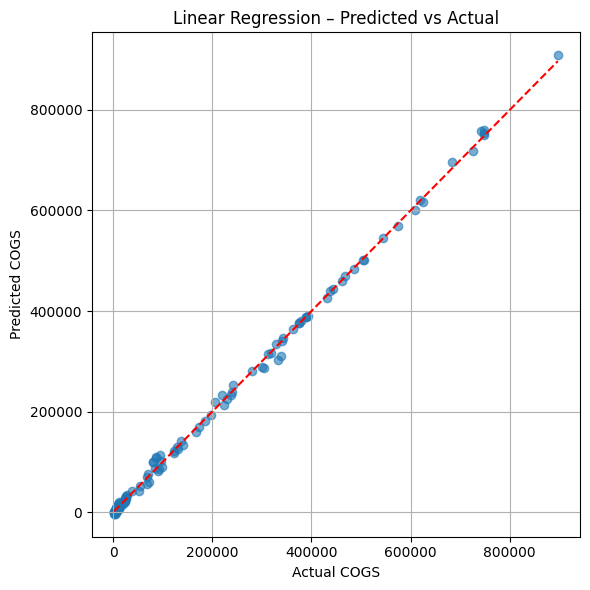

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual COGS")
plt.ylabel("Predicted COGS")
plt.title("Linear Regression – Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()


**Step 5 – Random Forest Regressor**

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
rf_preds = rf.predict(X_test)


*Evaluate the Model*

In [38]:
# Evaluation metrics
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

print(f"Random Forest Performance:")
print(f"MAE: {rf_mae:,.2f}")
print(f"RMSE: {rf_rmse:,.2f}")
print(f"R² Score: {rf_r2:.4f}")

Random Forest Performance:
MAE: 3,395.94
RMSE: 5,916.71
R² Score: 0.9992


*View Feature Importance*

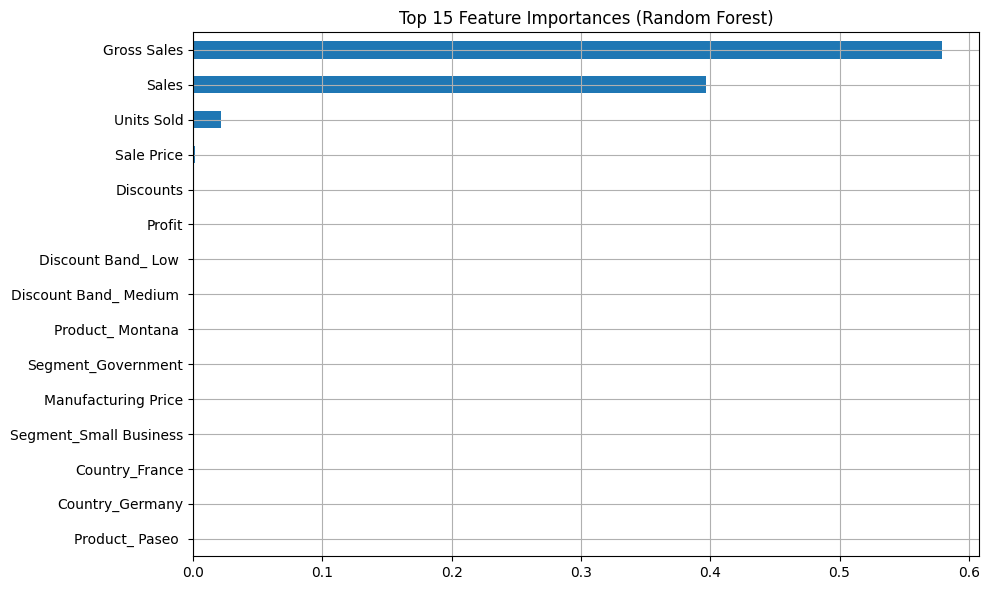

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
importances.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

**Save the Trained Model**

In [41]:
import joblib
import os

# Create a models folder
os.makedirs("models", exist_ok=True)

# Save the Random Forest model
joblib.dump(rf, "models/random_forest_cogs.pkl")

print("✅ Model saved as 'models/random_forest_cogs.pkl'")


✅ Model saved as 'models/random_forest_cogs.pkl'


**Save the Feature Columns**

In [42]:
# Save the column order used to train the model
feature_columns = list(X.columns)
joblib.dump(feature_columns, "models/feature_columns.pkl")

print("✅ Feature columns saved")

✅ Feature columns saved
